<a href="https://colab.research.google.com/github/E1N1K0/APPZE1N1K0/blob/main/EJERCICIO_DINAMICA_ND_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREA SMGdl**

---



**DATOS INICIALES**

In [1]:
# IMPORTAR LIBRERIAS
from sympy import *
import numpy as np

In [2]:
# DEFINICION DE SIMBOLOS
init_printing()

EI = symbols("EI")              #EI: Rigidez a la flexión.
L = symbols("L")                #L: Longitud.
rho = symbols("rho")            #rho: Densidad.
omega = symbols("omega")        #omega: Frecuencia natural.
lambd = symbols("lambda")       #omega^2.
u1,u2,u3 = symbols("u1,u2,u3")  #u1, u2, u3: Desplazamientos.
psi = symbols("psi")            #psi: Función de forma.
t = symbols("t")                #t: Tiempo.

In [3]:
# CIFRAS PERSONALIZADAS
"""Para determinar los ejercicios a desarrollar"""
C1 = 1
C2 = 0.89
C3 = 0.9
C4 = 1.1

estructuras = [f"Se evaluará la estructura numero {num}." for num in [
                1 if C1 % 2 == 0 else 2,
                3 if C2 % 2 == 0 else 4,
                5 if C3 % 2 == 0 else 6
                                        ]]

for estructura in estructuras:
    print(estructura)

Se evaluará la estructura numero 2.
Se evaluará la estructura numero 4.
Se evaluará la estructura numero 6.


**SOLUCION DEL EJERCICIO**

**DATOS DE ENTRADA PARA RESOLVER EL EJERCICIO**

In [4]:
#Definir la matriz de masa sin condensar y rigidez sin condensar,
#para el ejercicio que se desea resolver.

Ej = "1"   #<==== Definir el ejercicio a desarrollar.

if Ej == "1":
    M=Matrix([[rho*L/2,0,0],[0,0,0],[0,0,0]])
    K=Matrix([[12*EI/L**3, -6*EI/L**2, -6*EI/L**2],[-6*EI/L**2, 4*EI/L**1,2*EI/L**1],[-6*EI/L**2,2*EI/L**1, 12*EI/L**1]])

elif Ej == "2":
    M=Matrix([[rho*L/2,0,0],[0,0,0],[0,0,0]])
    K=Matrix([[12*EI/L**3, -6*EI/L**2, 0],[-6*EI/L**2, 12*EI/L**1,4*EI/L**1],[0,4*EI/L**1, 8*EI/L**1]])

elif Ej == "3":
    M=Matrix([[rho*L/2,0,0,0],[0,rho*L,0,0],[0,0,0,0],[0,0,0,0]])
    K=Matrix([[12*EI/(L**3), -12*EI/(L**3), -6*EI/(L**2), 0], [-12*EI/(L**3), 36*EI/(L**3), -6*EI/(L**2), -12*EI/(L**2)], [-6*EI/(L**2), -6*EI/(L**2), 12*EI/(L**1), 4*EI/(L**1)], [0, -12*EI/(L**2), 4*EI/(L**1), 8*EI/(L**1)]])

elif Ej == "4":
    M=Matrix([[rho*L/2,0,0,0],[0,rho*L/2,0,0],[0,0,0,0],[0,0,0,0]])
    K=Matrix([[24*EI/(L**3), 0, -12*EI/(L**2), 0], [0, 12*EI/(L**3), 6*EI/(L**2), 6*EI/(L**2)], [-12*EI/(L**2), 6*EI/(L**2), 12*EI/(L**1), 2*EI/(L**1)], [0, 6*EI/(L**2), 2*EI/(L**1), 4*EI/(L**1)]])

elif Ej == "5":
    M=Matrix([[3*rho*L,0,0],[0,2*rho*L,0],[0,0,0],[0,0,0]])
    K=Matrix([[96*EI/L**3, -24*EI/L**3, 18*EI/L**2],[-24*EI/L**3, 24*EI/L**3, 0],[18*EI/L**2,0, 12*EI/L**1]])

elif Ej == "6":
    M=Matrix([[5*rho*L/2,0,0],[0,rho*L/2,0],[0,0,0],[0,0,0]])
    K=Matrix([[48*EI/L**3, -12*EI/L**3, 6*EI/L**2],[-12*EI/L**3, 12*EI/L**3, 0],[6*EI/L**2,0, 4*EI/L**1]])

elif Ej == "3x3":
    M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    K = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

elif Ej == "4x4":
    M = Matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
    K = Matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

elif Ej == "libro":
    M=Matrix([[rho*L/4,0,0,0],[0,rho*L/2,0,0],[0,0,0,0],[0,0,0,0]])
    K = 4*EI/L**3*Matrix([[24, -24, -6*L, -6*L],[-24, 48, 6*L, 0],[-6*L, 6*L, 2*L**2, L**2],[-6*L, 0, L**2, 4*L**2]])

else:
    M = None
    K = None

In [5]:
#Matriz de masas sin condensar
M

⎡L⋅ρ      ⎤
⎢───  0  0⎥
⎢ 2       ⎥
⎢         ⎥
⎢ 0   0  0⎥
⎢         ⎥
⎣ 0   0  0⎦

In [6]:
#Matriz de Rigidez sin condensar
K

⎡12⋅EI   -6⋅EI   -6⋅EI ⎤
⎢─────   ──────  ──────⎥
⎢   3       2       2  ⎥
⎢  L       L       L   ⎥
⎢                      ⎥
⎢-6⋅EI    4⋅EI    2⋅EI ⎥
⎢──────   ────    ──── ⎥
⎢   2      L       L   ⎥
⎢  L                   ⎥
⎢                      ⎥
⎢-6⋅EI    2⋅EI   12⋅EI ⎥
⎢──────   ────   ───── ⎥
⎢   2      L       L   ⎥
⎣  L                   ⎦

**DESARROLLO:**

In [7]:
#Para automatizar el proceso, definir aceleraciones, u¨:
#segun criterio: Si no tiene masa la aceleracion es 0.
a = b = 1 if np.count_nonzero(M) == 1 else 2
print(f'Se reducirá a una matriz de {a,b}')

Se reducirá a una matriz de (1, 1)


In [8]:
#Submatriz de rigidez asociada a los gdl de desplazamiento
#Acceder a la submatriz en la esquina superior izquierda
Ktt= K[:a, :b]
Ktt

⎡12⋅EI⎤
⎢─────⎥
⎢   3 ⎥
⎣  L  ⎦

In [9]:
#Submatriz de rigidez asociada a los gdl de de desplazamiento y giro
#Acceder a la submatriz en la esquina inferior izquierda
Kot = K[a:, :b]
Kot

⎡-6⋅EI ⎤
⎢──────⎥
⎢   2  ⎥
⎢  L   ⎥
⎢      ⎥
⎢-6⋅EI ⎥
⎢──────⎥
⎢   2  ⎥
⎣  L   ⎦

In [10]:
#Submatriz de rigidez asociada a los gdl de giro
# Acceder a la submatriz en la esquina inferior derecha
Koo = K[(a):, (b):]
Koo

⎡4⋅EI  2⋅EI ⎤
⎢────  ──── ⎥
⎢ L     L   ⎥
⎢           ⎥
⎢2⋅EI  12⋅EI⎥
⎢────  ─────⎥
⎣ L      L  ⎦

In [11]:
#Matriz de rigidez condensada
Kcond = Ktt - Kot.transpose()*Koo.inv()*Kot
Kcond

⎡24⋅EI⎤
⎢─────⎥
⎢    3⎥
⎣11⋅L ⎦

In [12]:
#Matriz de Masa condensada, Mcond=Mtt
#Submatriz de masa asociada a los gdl de traslación
#Acceder a la submatriz en la esquina superior izquierda
Mcond = M[:a, :b]
Mcond

⎡L⋅ρ⎤
⎢───⎥
⎣ 2 ⎦

In [13]:
#Obtención de giros, en función de los desplazamientos
#Definir un vector que contiene los desplazamientos
#Segun el tamaño de la martiz M (a).
if a == 1:  #Solo u1.
    u = Matrix([[u1]])

else:  #u1 y u2.
    u = Matrix([[u1],[u2]])

u3 = -Koo.inv()*Kot*u
u3

⎡15⋅u₁⎤
⎢─────⎥
⎢ 11⋅L⎥
⎢     ⎥
⎢3⋅u₁ ⎥
⎢──── ⎥
⎣11⋅L ⎦

In [14]:
#Polinomio característico de det[(Kcond-w^2*M)]=0
Pol = det(Kcond-lambd*Mcond)
simplify(Pol)  #Con N() se muestra el resultado con decimales.

24⋅EI   L⋅λ⋅ρ
───── - ─────
    3     2  
11⋅L         

In [15]:
#Resolución del polinomio característico de det[(Kcond-w^2*M)]=0
#La solución son las frecuencias al cuadrado w^2 (lambd)
freqs=solve(Pol,lambd)
freqs

⎡ 48⋅EI ⎤
⎢───────⎥
⎢    4  ⎥
⎣11⋅L ⋅ρ⎦

In [16]:
#Primera frecuencia al cuadrado
freq1=simplify(freqs[0])
freq1

 48⋅EI 
───────
    4  
11⋅L ⋅ρ

In [17]:
#Segunda frecuencia al cuadrado
if a != 1: #cuando se cumpla que a sea diferente de 1, se imprimirán los resultados
    freq2=simplify(freqs[1])
    freq2
else:
    freq2 = false
simplify(freq2)

False

In [18]:
#Método alternativo de sacar las frecuencias de los modos, resolver det[(Kcond*M^(-1)-w^2*I)]=0
#Esta transformación permite calcular las frecuencias como un problema de valores propios.
#Maux es la matriz (Kcond*M^(-1)-w^2*I)
Maux = Mcond.inv()*Kcond
Maux

⎡ 48⋅EI ⎤
⎢───────⎥
⎢    4  ⎥
⎣11⋅L ⋅ρ⎦

In [19]:
#De esta manera, el cálculo de fecuencias (valores propios), es más sencillo con el comando eigenvals()
#El resultado es un vector, donde en cada componente el primer valor es la frecuencia al cuadrado.
#El segundo (después de los :) es el número de veces que se repite
freqss=Maux.eigenvals()
freqss

⎧ 48⋅EI    ⎫
⎪───────: 1⎪
⎨    4     ⎬
⎪11⋅L ⋅ρ   ⎪
⎩          ⎭

In [20]:
#De la mimsa manera, el cálculo de modos (valores propios), es más sencillo con el comando eigenvects()
#El resultado es un vector, donde en cada componente el primer valor es la frecuencia al cuadrado.
#El segundo es el número de veces que se repite
#El tercero es el vector propio
Modes = Maux.eigenvects()
Modes

⎡⎛ 48⋅EI           ⎞⎤
⎢⎜───────, 1, [[1]]⎟⎥
⎢⎜    4            ⎟⎥
⎣⎝11⋅L ⋅ρ          ⎠⎦

In [21]:
#Guardamos el primer vector propio (asociado a la primera frecuencia) en la variable V1
V1 = Modes[0][2][0]
V1

[1]

In [22]:
#Como V1 no está normalizado a la primera componente, multiplicamos V1 por la inversa de la primera componente
V1 = V1*1.0/V1[0]
simplify(V1)

[1]

In [23]:
#Para obtener las componentes del vector de modos de vibración asociadas al giro,
#se utiliza la expresión de los giros u3, donde insertamos los valores de la primera y segunda componetes del vector
#Modo 1
#Segun el tamaño de la martiz M (a).
if a == 1:  #Solo u1.
    s=u3.subs([(u1,V1[0])])
else:  #u1 y u2.
    s=u3.subs([(u1,V1[0]),(u2,V1[1])])
simplify(s)

⎡ 15 ⎤
⎢────⎥
⎢11⋅L⎥
⎢    ⎥
⎢ 3  ⎥
⎢────⎥
⎣11⋅L⎦

In [24]:
#Guardamos el segundo vector propio (asociado a la segunda frecuencia) en la variable V2 (sera falso si la matriz es de 1x1)
if a != 1:  #Solo u1.
    V2 = Modes[1][2][0]
else:
    V2 = false
V2

False

In [25]:
#Como V2 no está normalizado a la primera componente, multiplicamos V2 por la inversa de la primera componente
if a != 1:
    V2 = V2*1.0/V2[0]
else:
    V2 = false
simplify(V2)

False

In [26]:
#Para obtener las componentes del vector de modos de vibración asociadas al giro,
#se utiliza la expresión de los giros u3, donde insertamos los valores de la primera y segunda componetes del vector
#modo 2
if a != 1:
    mvg = simplify(u3.subs([(u1,V2[0]),(u2,V2[1])]))
else:
    mvg = false

mvg

False

In [27]:
#Masa modal del modo 1
M1 = V1.transpose()*Mcond*V1
M1 = M1[0]

In [28]:
simplify(M1)

L⋅ρ
───
 2 

In [29]:
#Masa modal del modo 2
if a != 1:
    M2 = V2.transpose()*Mcond*V2
    M2 = M2[0]
else:
    M2 = false
simplify(M2)

False

In [30]:
#Rigidez modal asociada al modo 1
K1 = V1.transpose()*Kcond*V1
K1 = K1[0]

In [31]:
simplify(K1)

24⋅EI
─────
    3
11⋅L 

In [32]:
#Rigidez modal asociada al modo 2
if a != 1:
    K2 = V2.transpose()*Kcond*V2
    K2 = K2[0]
else:
    K2 = false
simplify(K2)

False

In [33]:
#Comprobación de que los modos son ortogonales con respecto a la matriz de rigidez
if a == 1:  #Solo u1.
    pass
else:
    simplify(V1.transpose()*Kcond*V2)

In [34]:
#Comprobación de que los modos son ortogonales con respecto a la matriz de masas
if a != 1:
    simplify(V1.transpose()*Mcond*V2)

In [35]:
#Problema de vibraciones libres, condiciones iniciales
if a == 1:  #Solo u1.
    Uo = Matrix([[1]]) #Desplazamientos iniciales
    Vo = Matrix([[0]]) #Velocidades iniciales
else:
    Uo = Matrix([[1],[0]]) #Desplazamientos iniciales
    Vo = Matrix([[0],[0]]) #Velocidades iniciales

In [36]:
#Condicion inicial de desplazamiento asociada al modo 1
q1o = V1.transpose()*Mcond*Uo/M1
simplify(q1o)

[1]

In [37]:
#Condicion inicial de desplazamiento asociada al modo 2
if a != 1:
    q2o=V2.transpose()*Mcond*Uo/M2
else:
    q2o=false
simplify(q2o)

False

In [38]:
#Condicion inicial de velocidad asociada al modo 1
qv1o=V1.transpose()*Mcond*Vo/M1
simplify(qv1o)

[0]

In [39]:
#Condicion inicial de velocidad asociada al modo 2
if a != 1:
    qv2o=V2.transpose()*Mcond*Vo/M2
else:
    qv2o=false
simplify(qv2o)

False

In [40]:
#Frecuencia del modo 1, es la raiz cuadrada de w1^2, también se calcula la frecuencia amortiguada
omega1  = sqrt(freq1)
omega1d = omega1*sqrt(1-psi**2)

#Respuesta del primer modo
q1 = exp(-psi*omega1*t)*(q1o*cos(omega1d*t)+(psi*q1o*omega1+qv1o)/omega1d*sin(omega1d*t))
simplify(q1)

⎡                                                                             
⎢                                                                             
⎢⎛     ⎛             ______    ________⎞                  ⎛             ______
⎢⎜     ⎜            ╱  EI     ╱      2 ⎟                  ⎜            ╱  EI  
⎢⎜     ⎜4⋅√33⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⎟                  ⎜4⋅√33⋅t⋅   ╱  ──── 
⎢⎜     ⎜          ╱    4               ⎟      ________    ⎜          ╱    4   
⎢⎜     ⎜        ╲╱    L ⋅ρ             ⎟     ╱      2     ⎜        ╲╱    L ⋅ρ 
⎢⎜ψ⋅sin⎜───────────────────────────────⎟ + ╲╱  1 - ψ  ⋅cos⎜───────────────────
⎢⎝     ⎝               11              ⎠                  ⎝               11  
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                       ________              
⎢                                                      ╱      2               
⎣                                                   

In [41]:
#Frecuencia del modo 2, es la raiz cuadrada de w1^2, también se calcula la frecuencia amortiguada
if a == 1:  #Solo u1.
    pass
else:
    omega2=sqrt(freq2)
    omega2d = omega2*sqrt(1-psi**2)
    #Respuesta del segundo modo
    q2=exp(-psi*omega2*t)*(q2o*cos(omega2d*t)+(psi*q2o*omega2+qv2o)/omega2d*sin(omega2d*t))
    simplify(q2)

In [42]:
#Respuesta total, suma de las respuestas de los modos (ver principio de descomposicón modal)
if a == 1:  #Solo u1.
    u = V1*q1
else:
    u = V1*q1 + V2*q2
simplify(u)

⎡                                                                             
⎢                                                                             
⎢⎛     ⎛             ______    ________⎞                  ⎛             ______
⎢⎜     ⎜            ╱  EI     ╱      2 ⎟                  ⎜            ╱  EI  
⎢⎜     ⎜4⋅√33⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⎟                  ⎜4⋅√33⋅t⋅   ╱  ──── 
⎢⎜     ⎜          ╱    4               ⎟      ________    ⎜          ╱    4   
⎢⎜     ⎜        ╲╱    L ⋅ρ             ⎟     ╱      2     ⎜        ╲╱    L ⋅ρ 
⎢⎜ψ⋅sin⎜───────────────────────────────⎟ + ╲╱  1 - ψ  ⋅cos⎜───────────────────
⎢⎝     ⎝               11              ⎠                  ⎝               11  
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                       ________              
⎢                                                      ╱      2               
⎣                                                   

In [43]:
#Metemos los valores de parámetros en la fórmula
N(simplify(u.subs({EI:1,psi:0.1,L:1,rho:1})))

⎡                                                                             
⎣(0.100503781525921⋅sin(0.361813613493316⋅√33⋅t) + cos(0.361813613493316⋅√33⋅t

    -0.0363636363636364⋅√33⋅t⎤
))⋅ℯ                         ⎦

In [44]:
#Evaluamos numéricamente la fórmula
N(u.subs({EI:1,psi:0.1,L:1,rho:1}))

⎡                                                                             
⎣(0.100503781525921⋅sin(0.361813613493316⋅√33⋅t) + cos(0.361813613493316⋅√33⋅t

    -0.0363636363636364⋅√33⋅t⎤
))⋅ℯ                         ⎦

**GRAFICA DE LA SOLUCION**

In [45]:
#Importar librerias para generar la gráfica de la solución
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
#Grafica de la solución del primer gdl
#de t=0 a t=50s, cada 0.1s
t_vec  = np.arange(0, 50, 0.1)
if a == 1:  #Solo u1.
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    u_vec2 = false
else:
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    u_vec2 = np.array([N(u[1].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])

In [47]:
u_vec1

array([1.00000000000000, 0.978560429043120, 0.916328851382479,
       0.817624350187768, 0.688142378491397, 0.534655915971045,
       0.364682970310136, 0.186135958774953, 0.00696864154134767,
       -0.165164258690912, -0.323220775742413, -0.461046489732588,
       -0.573600279340514, -0.657123430031010, -0.709247215000460,
       -0.729036885376905, -0.716972798476508, -0.674872059898103,
       -0.605756450160046, -0.513674457781362, -0.403486874902307,
       -0.280626576203301, -0.150843766633939, -0.0199481404541770,
       0.106440942590664, 0.223125953954030, 0.325535258098854,
       0.409892172609575, 0.473343259848933, 0.514042055377821,
       0.531186491232501, 0.525010315204104, 0.496730753895245,
       0.448456438591082, 0.383061140628811, 0.304030091897933,
       0.215286556244606, 0.121006844845943, 0.0254321254581366,
       -0.0673148296946364, -0.153400356188872, -0.229431313626093,
       -0.292581547729138, -0.340689034345806, -0.372320768388968,
       -0.38680

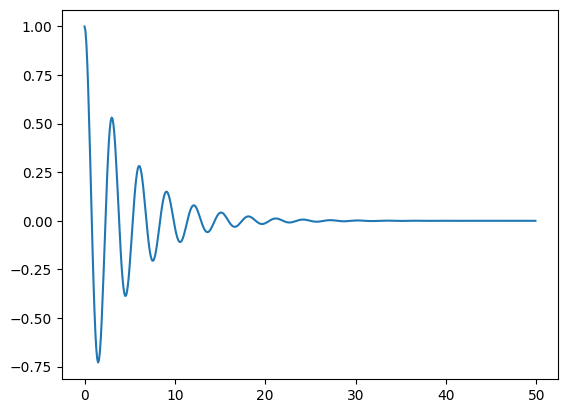

In [48]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, u_vec1);
    plt.show()
else:
    plt.plot(t_vec, u_vec1);
    plt.plot(t_vec, u_vec2);
    plt.show()

In [49]:
#Respuesta en velocidad (derivada del desplazamiento con respecto al tiempo)
v = diff(u,t)
v

⎡                      ⎛     ⎛             ______    ________⎞                
⎢                      ⎜     ⎜            ╱  EI     ╱      2 ⎟                
⎢                      ⎜     ⎜4⋅√33⋅t⋅   ╱  ──── ⋅╲╱  1 - ψ  ⎟      ⎛         
⎢                      ⎜     ⎜          ╱    4               ⎟      ⎜         
⎢                      ⎜     ⎜        ╲╱    L ⋅ρ             ⎟      ⎜4⋅√33⋅t⋅ 
⎢               ______ ⎜ψ⋅sin⎜───────────────────────────────⎟      ⎜         
⎢              ╱  EI   ⎜     ⎝               11              ⎠      ⎜        ╲
⎢  4⋅√33⋅ψ⋅   ╱  ──── ⋅⎜────────────────────────────────────── + cos⎜─────────
⎢            ╱    4    ⎜                ________                    ⎝         
⎢          ╲╱    L ⋅ρ  ⎜               ╱      2                               
⎢                      ⎝             ╲╱  1 - ψ                                
⎢- ───────────────────────────────────────────────────────────────────────────
⎣                                                   

In [50]:
#Grafica de la solución del primer gdl
#de t=0 a t=50s, cada 0.1s
t_vec  = np.arange(0, 5, 0.01)
if a == 1:  #Solo u1.
    v_vec1 = np.array([N(v[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    v_vec2 = false
else:
    v_vec1 = np.array([N(v[0].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])
    v_vec2 = np.array([N(v[1].subs({EI:1,psi:0.1,L:1,rho:1,t:tt})) for tt in t_vec])

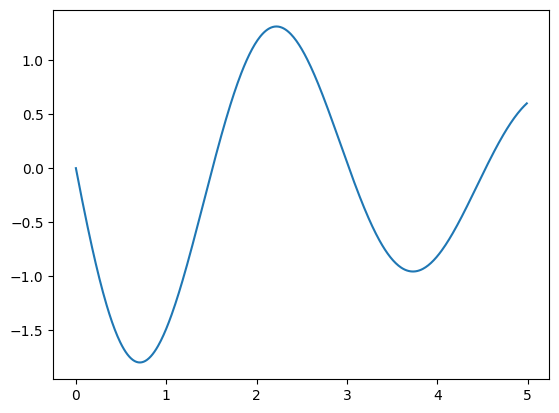

In [51]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, v_vec1);
    plt.show()
else:
    plt.plot(t_vec, v_vec1);
    plt.plot(t_vec, v_vec2);
    plt.show()

In [52]:
#Respuesta bajo una carga armónica aplicada en el gdl 1
if a == 1:  #Solo u1.
    p=Matrix([[cos(omega*t)]])
else:
    p=Matrix([[cos(omega*t)],[0]])
p

[cos(ω⋅t)]

In [53]:
#Carga asociada al primer modo
p1=V1.transpose()*p
p1=p1[0]
simplify(p1)

cos(ω⋅t)

In [54]:
#Carga asociada al segundo modo
if a != 1:
    p2=V2.transpose()*p
    p2=p2[0]
else:
    p2 = false
simplify(p2)

False

In [55]:
#Respuesta del primer modo
omega1=sqrt(freq1)
omega1d = omega1*sqrt(1-psi**2)
beta1=omega/omega1
p1a=p1/cos(omega*t)
q1=p1a/K1*((1-beta1**2)/((1-beta1**2)**2+(2*psi*beta1)**2)*sin(omega*t)-2*psi*beta1/((1-beta1**2)**2+(2*psi*beta1)**2)*cos(omega*t))
q1=simplify(q1)
q1

      ⎛                              ______                              ⎞
    3 ⎜                             ╱  EI   ⎛            4  2  ⎞         ⎟
22⋅L ⋅⎜-8⋅√33⋅EI⋅ω⋅ψ⋅cos(ω⋅t) +    ╱  ──── ⋅⎝48⋅EI - 11⋅L ⋅ω ⋅ρ⎠⋅sin(ω⋅t)⎟
      ⎜                           ╱    4                                 ⎟
      ⎝                         ╲╱    L ⋅ρ                               ⎠
──────────────────────────────────────────────────────────────────────────
              ______ ⎛                                         2⎞         
             ╱  EI   ⎜         4  2  2     ⎛            4  2  ⎞ ⎟         
            ╱  ──── ⋅⎝2112⋅EI⋅L ⋅ω ⋅ψ ⋅ρ + ⎝48⋅EI - 11⋅L ⋅ω ⋅ρ⎠ ⎠         
           ╱    4                                                         
         ╲╱    L ⋅ρ                                                       

In [56]:
if a != 1:
    omega2=sqrt(freq2)
    omega2d = omega2*sqrt(1-psi**2)
    beta2=omega/omega2
    p2a=p2/cos(omega*t)
    q2=p2a/K2*((1-beta2**2)/((1-beta2**2)**2+(2*psi*beta2)**2)*sin(omega*t)-2*psi*beta2/((1-beta2**2)**2+(2*psi*beta2)**2)*cos(omega*t))
else:
    q2 = false
simplify(q2)

False

In [57]:
if a != 1:
    u = V1*q1+V2*q2
else:
    u = V1*q1
simplify(u)

⎡      ⎛                              ______                              ⎞⎤
⎢    3 ⎜                             ╱  EI   ⎛            4  2  ⎞         ⎟⎥
⎢22⋅L ⋅⎜-8⋅√33⋅EI⋅ω⋅ψ⋅cos(ω⋅t) +    ╱  ──── ⋅⎝48⋅EI - 11⋅L ⋅ω ⋅ρ⎠⋅sin(ω⋅t)⎟⎥
⎢      ⎜                           ╱    4                                 ⎟⎥
⎢      ⎝                         ╲╱    L ⋅ρ                               ⎠⎥
⎢──────────────────────────────────────────────────────────────────────────⎥
⎢              ______ ⎛                                         2⎞         ⎥
⎢             ╱  EI   ⎜         4  2  2     ⎛            4  2  ⎞ ⎟         ⎥
⎢            ╱  ──── ⋅⎝2112⋅EI⋅L ⋅ω ⋅ψ ⋅ρ + ⎝48⋅EI - 11⋅L ⋅ω ⋅ρ⎠ ⎠         ⎥
⎢           ╱    4                                                         ⎥
⎣         ╲╱    L ⋅ρ                                                       ⎦

In [58]:
N(u.subs({EI:1,psi:0.1,L:1,rho:1,omega:10}))

[-0.0208727146794419⋅sin(10⋅t) - 0.000911822183113062⋅cos(10⋅t)]

In [59]:
t_vec = np.arange(0, 3, 0.01)
if a == 1:  #Solo u1.
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])
else:
    u_vec1 = np.array([N(u[0].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])
    u_vec2 = np.array([N(u[1].subs({EI:1,psi:0.1,L:1,rho:1,omega:10,t:tt})) for tt in t_vec])

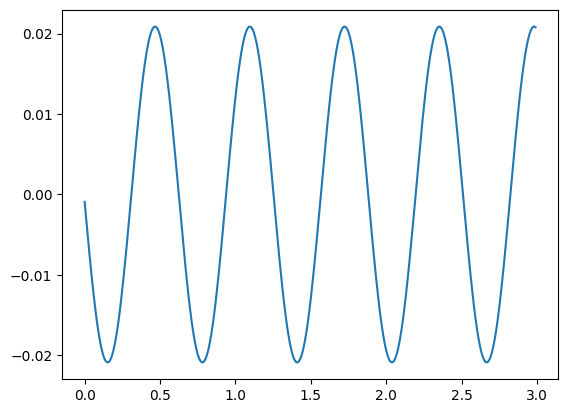

In [60]:
if a == 1:  #Solo u1.
    plt.plot(t_vec, u_vec1);
    plt.show()
else:
    plt.plot(t_vec, u_vec1);
    plt.plot(t_vec, u_vec2);
    plt.show()